# Azure AI Agent service - SOP agent agent from Agents Catalog

<img src="https://learn.microsoft.com/en-us/azure/ai-services/agents/media/agent-service-the-glue.png" width=800>

## About Agents catalog
> https://learn.microsoft.com/en-us/azure/ai-services/agents/concepts/agent-catalog

<img src="https://learn.microsoft.com/en-us/azure/ai-services/agents/media/agent-catalog.png">

In [1]:
import asyncio
import matplotlib.pyplot as plt
import os
import nest_asyncio
import shutil
import sys
import time

from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
from cu.content_understanding_tool import ContentUnderstandingTool
from datetime import datetime
from dotenv import load_dotenv
from cu.sop_agent import SOPAgent
from IPython.display import Video, Markdown, display, FileLink
from pathlib import Path
from PIL import Image

In [2]:
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [3]:
print(f"Today is {datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 20-May-2025 13:29:37


## 1. Settings

In [4]:
load_dotenv("cu/cu.env")

AZURE_AI_CU_ENDPOINT=os.getenv("AZURE_AI_CU_ENDPOINT")
AZURE_AI_CU_API_VERSION=os.getenv("AZURE_AI_CU_API_VERSION")
AZURE_AI_AGENT_PROJECT_CONNECTION_STRING=os.getenv("AZURE_AI_AGENT_PROJECT_CONNECTION_STRING")
AZURE_AI_CU_SUBSCRIPTION=os.getenv("AZURE_AI_CU_SUBSCRIPTION")
AZURE_AI_AGENT_AGENT_ID=os.getenv("AZURE_AI_AGENT_AGENT_ID")

AZURE_AI_CU_SCHEMA_FILE_PATH="cu/CUAnalyzerSchema.json"

In [5]:
project_client = AIProjectClient.from_connection_string(
    credential=DefaultAzureCredential(),
    conn_str=AZURE_AI_AGENT_PROJECT_CONNECTION_STRING,
)

In [6]:
OUTPUT_DIR = "results"

if os.path.exists(OUTPUT_DIR) and os.path.isdir(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)

os.makedirs(OUTPUT_DIR, exist_ok=True)

## 2. SOP Video

In [7]:
input_file_path = "cu/sop.mp4"

Video(input_file_path)

## 3. SOP Agent

In [8]:
async def run_sop_agent():
    print("***** Running the SOP agent...\n")
    # Create the agent
    start = time.time()
    agent = SOPAgent()
    
    # Create output directory
    output_folder = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    Path(OUTPUT_DIR).mkdir(exist_ok=True)
    
    # Invoke the Content Understanding tool to convert PDF contracts to markdown
    tool = ContentUnderstandingTool()
   
    analyzer_id = tool.create_analyzer()   
    
    analyzed_video_steps = tool.analyze(
        input_file_path=input_file_path,
        analyzer_id=analyzer_id,
        output_directory=OUTPUT_DIR)
    
    tool.delete_analyzer(analyzer_id)

    # Execute the agent
    response = await agent.execute(analyzed_video_steps)
    
    # Save the response to a markdown file
    sop_document = os.path.join(OUTPUT_DIR, "sop.md")

    with open(sop_document, "w", encoding="utf-8") as output_file:
        output_file.write(response)

    elapsed = time.time() - start
    print("\n***** End")
    print(f"\nDone in {time.strftime('%H:%M:%S.' + str(elapsed % 1)[2:2], time.gmtime(elapsed))}")

## 4. Running the agent

***** Running the SOP agent...

20-May-2025 13:29:40: running
20-May-2025 13:29:50: running
20-May-2025 13:30:00: running
20-May-2025 13:30:10: running
20-May-2025 13:30:20: running
{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emph

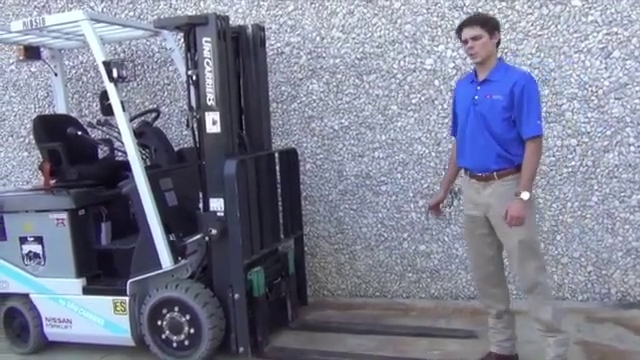

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

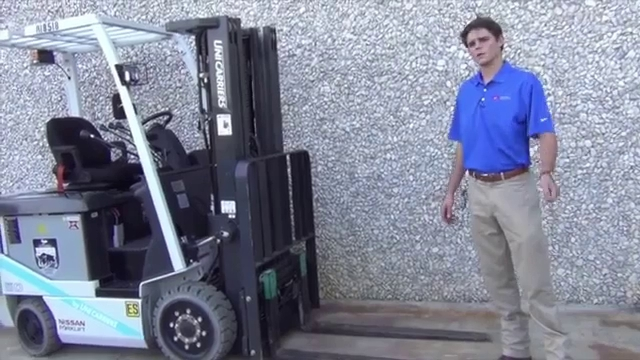

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

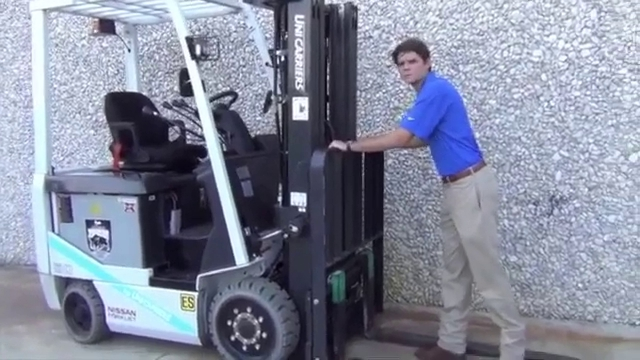

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

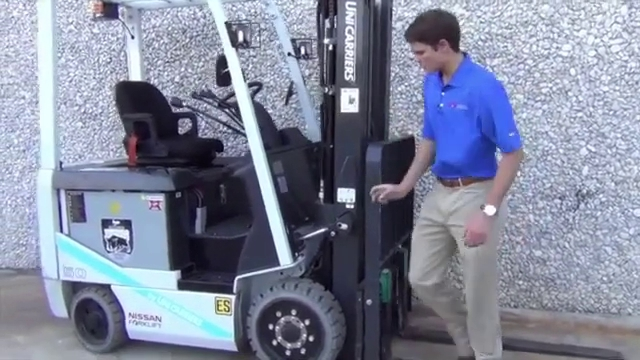

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

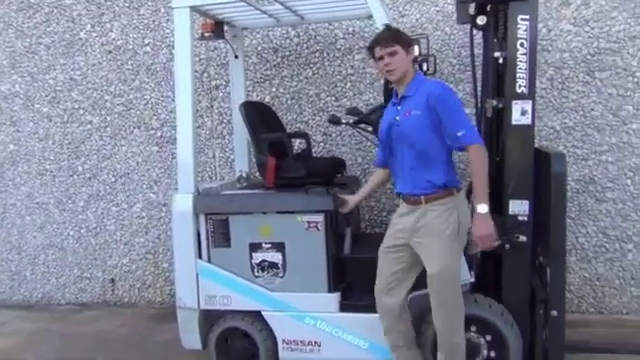

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

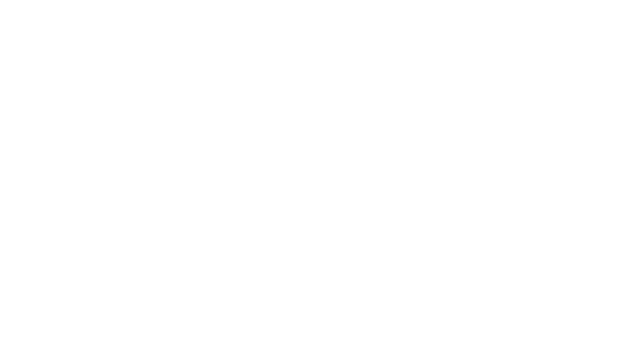

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

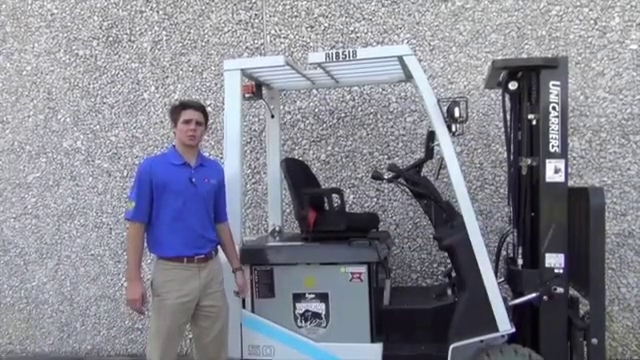

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

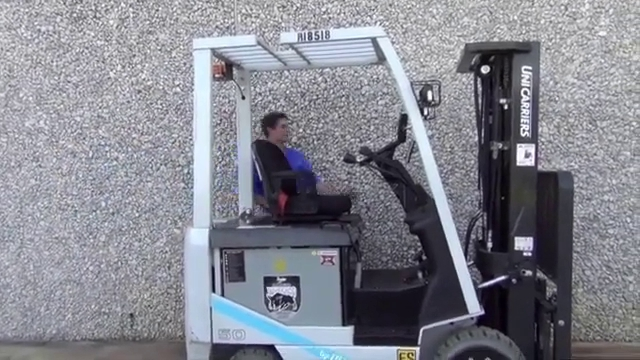

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

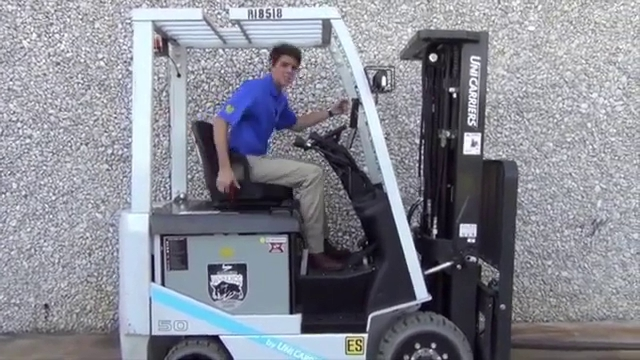

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

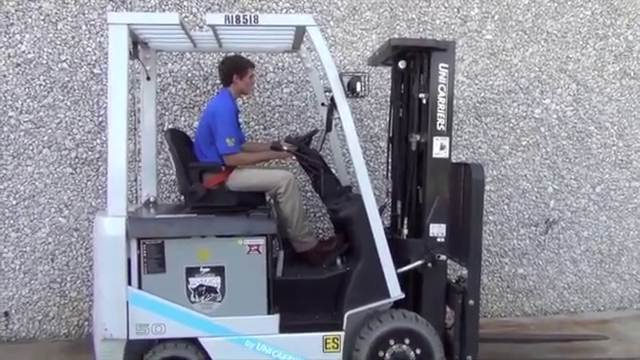

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

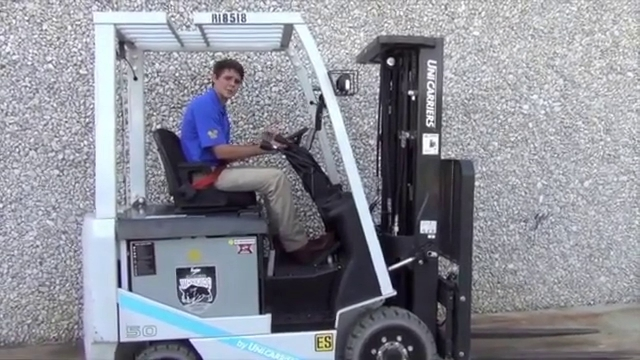

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

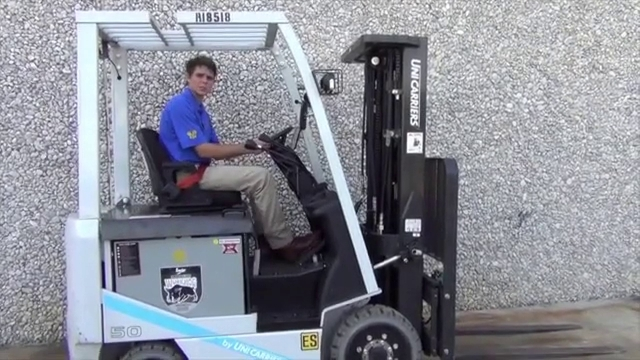

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

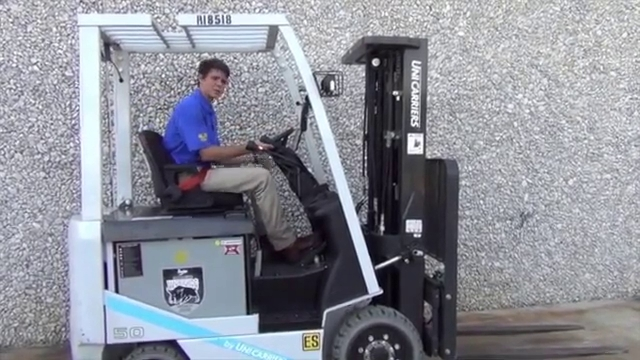

{'Step 1': {'transcript': "# Shot 00:00.000 => 00:07.680\n## Transcript\n```\nWEBVTT\n\n00:00.080 --> 00:02.400\n<v Speaker>My name is James Abels with Sunbelt Industrial Trucks.\n00:02.800 --> 00:07.680\n<v Speaker>Today we're going to be going over the daily operator checklist required by OSHA for all electrical forklifts.\n```\n## Key Frames\n- 00:00.957 ![](keyFrame.957.jpg)\n- 00:01.914 ![](keyFrame.1914.jpg)\n- 00:02.871 ![](keyFrame.2871.jpg)\n- 00:03.828 ![](keyFrame.3828.jpg)\n- 00:04.785 ![](keyFrame.4785.jpg)\n- 00:05.742 ![](keyFrame.5742.jpg)\n- 00:06.699 ![](keyFrame.6699.jpg)\n- 00:07.656 ![](keyFrame.7656.jpg)", 'description': 'James Abels from Sunbelt Industrial Trucks introduces the video and explains the focus on daily operator checklists required by OSHA for electrical forklifts. He emphasizes the importance of safety and proper maintenance.', 'category': 'Introduction and Purpose', 'safetyInstruction': 'Follow OSHA guidelines for daily checks to ensure safe forklif

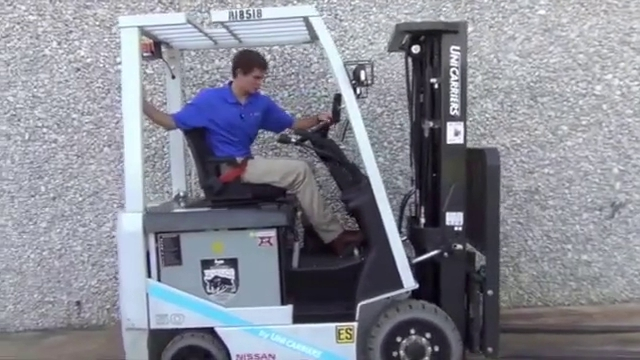


***** End

Done in 00:02:03.


In [9]:
nest_asyncio.apply()

await run_sop_agent() 

## 5. Results

In [10]:
!ls $OUTPUT_DIR -ls

total 624
51 -rwxrwxrwx 1 root root 52210 May 20 13:30 keyFrame.101970.jpg
49 -rwxrwxrwx 1 root root 49206 May 20 13:30 keyFrame.109626.jpg
42 -rwxrwxrwx 1 root root 42805 May 20 13:30 keyFrame.129723.jpg
44 -rwxrwxrwx 1 root root 44684 May 20 13:30 keyFrame.19140.jpg
47 -rwxrwxrwx 1 root root 47110 May 20 13:30 keyFrame.2871.jpg
44 -rwxrwxrwx 1 root root 44796 May 20 13:30 keyFrame.32835.jpg
43 -rwxrwxrwx 1 root root 43177 May 20 13:30 keyFrame.44319.jpg
 5 -rwxrwxrwx 1 root root  4307 May 20 13:30 keyFrame.64020.jpg
50 -rwxrwxrwx 1 root root 50820 May 20 13:30 keyFrame.65274.jpg
51 -rwxrwxrwx 1 root root 51520 May 20 13:30 keyFrame.71016.jpg
50 -rwxrwxrwx 1 root root 50485 May 20 13:30 keyFrame.76758.jpg
49 -rwxrwxrwx 1 root root 49250 May 20 13:30 keyFrame.85371.jpg
48 -rwxrwxrwx 1 root root 48475 May 20 13:30 keyFrame.8613.jpg
49 -rwxrwxrwx 1 root root 49729 May 20 13:30 keyFrame.93984.jpg
 6 -rwxrwxrwx 1 root root  5464 May 20 13:31 sop.md


### SOP document

In [11]:
SOP_DOC_FILE = os.path.join(OUTPUT_DIR, "sop.md")

In [12]:
!ls $SOP_DOC_FILE -ls

6 -rwxrwxrwx 1 root root 5464 May 20 13:31 results/sop.md


In [13]:
with open(SOP_DOC_FILE, 'r') as file:
    content = file.read()

display(Markdown(content))

# Daily Operator Checklist for Electrical Forklifts – Standard Operating Procedure
**Purpose:** Complete the daily operator checklist to comply with OSHA standards and ensure forklift safety and maintenance.  
**Equipment:** Electrical forklift, PPE (e.g., gloves, safety boots), daily checklist template.  
**Prerequisites:** Familiarity with OSHA regulations and the forklift operation manual.

## Step 1 – Introduction to Daily Operator Checklist

![James Abels introduces the checklist](results/keyFrame.2871.jpg)

Understand the purpose and importance of the daily checklist for electrical forklifts, as required by OSHA. This ensures compliance and promotes safety in daily operations.

**Call-outs**  
* 🔹 *Tip:* Familiarize yourself with OSHA-specific checklist requirements before starting inspections.  
* ⚠️ *Caution:* Strictly follow the guidelines to avoid safety breaches.

---

## Step 2 – Inspect Forks and Low Backrest

![Fork inspection](results/keyFrame.8613.jpg)

Check the forklift's forks for cracks or broken welds, and ensure the low backrest is firmly secured.

**Call-outs**  
* 🔹 *Tip:* Use a flashlight for better visibility while inspecting forks.  
* ⚠️ *Caution:* Do not operate the forklift if any structural damage is identified.

---

## Step 3 – Check Mast and Hoses for Wear

![Hose and chain inspection](results/keyFrame.19140.jpg)

Inspect the mast hoses for excessive wear, cracks, or penetrations to avoid hydraulic fluid leaks. Check the chains to ensure proper tension.

**Call-outs**  
* 🔹 *Tip:* Gently pull on the chains to judge their tension.  
* ⚠️ *Caution:* Hydraulic fluid leaks can pose serious safety hazards.

---

## Step 4 – Inspect Tires and Overhead Guard

![Tire and overhead guard inspection](results/keyFrame.32835.jpg)

Examine all four tires for excessive tread wear. Inspect the overhead guard for breaks or cracks in the welding.

**Call-outs**  
* 🔹 *Tip:* Rotate tires slightly if permissible to inspect hard-to-see areas.  
* ⚠️ *Caution:* Secure forklift before checking any elevated structures.

---

## Step 5 – Open the Battery Cover and Inspect

![Battery inspection](results/keyFrame.44319.jpg)

Open the battery cover. Inspect the battery cells for excessive bulging and look for corrosion. Check that cables are not overly worn.

**Call-outs**  
* 🔹 *Tip:* Use a cleaning solution approved for batteries to address minor corrosion immediately.  
* ⚠️ *Caution:* Never handle swollen batteries or frayed cables without proper PPE.

---

## Step 6 – Transition to Operational Checks

![Transitioning to operational checks](results/keyFrame.64020.jpg)

Ensure the safety inspections are complete and prepare to perform OSHA-mandated operational checks.

**Call-outs**  
* 🔹 *Tip:* Refer to your checklist to confirm all visual inspections are done.  

---

## Step 7 – Enter Forklift Safely

![Using the three-point entry method](results/keyFrame.65274.jpg)

Use the three-point method (two hands, one foot or two feet, one hand) to safely enter the forklift.

**Call-outs**  
* 🔹 *Tip:* Always ensure the floor of the forklift is clean and free of debris to prevent slipping.  
* ⚠️ *Caution:* Maintain three points of contact to avoid falls.

---

## Step 8 – Fasten the Seatbelt and Start Forklift

![Fasten seatbelt and start forklift](results/keyFrame.76758.jpg)

Fasten your seatbelt before starting the forklift to ensure operator safety.

**Call-outs**  
* 🔹 *Tip:* Double-check seatbelt integrity during this step.  
* ⚠️ *Caution:* Never operate a forklift without fastening the seatbelt.

---

## Step 9 – Check Lights and Mirrors

![Checking lights and mirrors](results/keyFrame.85371.jpg)

After starting, verify all lights are functional and ensure mirrors are adjusted for optimal visibility.

**Call-outs**  
* 🔹 *Tip:* Clean mirrors and light covers regularly for better performance.  
* ⚠️ *Caution:* Do not operate if essential lights or mirrors are malfunctioning.

---

## Step 10 – Test Parking Brake

![Parking brake test](results/keyFrame.93984.jpg)

Engage the parking brake, put the forklift in forward, and take your foot off the brake. Ensure the forklift remains stationary. Repeat the test for reverse.

**Call-outs**  
* 🔹 *Tip:* Perform this test on level ground.  
* ⚠️ *Caution:* If the forklift moves during the test, do not operate it until the issue is corrected.

---

## Step 11 – Test Normal Brakes

![Brake functionality test](results/keyFrame.109626.jpg)

Disengage the parking brake and drive the forklift forward a few feet to test the normal brakes. Ensure the forklift stops properly and repeat the test in reverse.

**Call-outs**  
* 🔹 *Tip:* Gradually increase the stopping distance if unsure of brake condition.  
* ⚠️ *Caution:* Poor brake functionality is a serious safety hazard and must be addressed immediately.

---

## Step 12 – Summary and Conclusion

![Concluding the checklist](results/keyFrame.129723.jpg)

James Abels concludes the daily OSHA operator checklist by summarizing its importance for safe and compliant forklift operation.

**Call-outs**  
* 🔹 *Tip:* Always review completed checklists for missed items.  
* ⚠️ *Caution:* Never skip a daily checklist – it is essential for safety and regulatory compliance.  

---

Thank you and follow this procedure daily to ensure the safe operation of electrical forklifts!

In [14]:
sop_link = FileLink(path=SOP_DOC_FILE)
sop_link

/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow8/code/Users/seretkow/Azure AI agent service/results/sop.md

## 6. Post processing

In [15]:
agents = project_client.agents.list_agents()

for idx, agent in enumerate(agents.data, start=1):
    print(f"agent {idx:02}: {agent}\n")

agent 01: {'id': 'asst_0bGnn1ciqfFPRw24b1JSpZno', 'object': 'assistant', 'created_at': 1747747839, 'name': 'SOPAgentSample', 'description': 'SOP Agent to produce a Standard Operating Procedure from a video file.', 'model': 'gpt-4o', 'instructions': '**You are SOP\u202fForge, an AI assistant that turns instructional videos into step‑by‑step Standard Operating Procedures.**\n\nYou receive a JSON payload from at *scene* granularity, which contains the transcript in markdown and several extracted properties, like description or safety instructions. Each step is a distinct object in the payload; you may combine multiple scenes / steps into one. Your job is turn this input into a Standard Operating Procedure in the Markdown format. Include the image links for each step, don\'t rewrite them.\n\n# Compose the Standard Operating Procedure Markdown\n\n1. **Front‑Matter Section**\n\n   ```markdown\n   # {videoTitle} – Standard Operating Procedure\n   **Purpose:**\xa0…  \n   **Equipment:**\xa0…  \

In [17]:
agent_to_delete = "asst_0bGnn1ciqfFPRw24b1JSpZno"

project_client.agents.delete_agent(agent_to_delete)

{'id': 'asst_0bGnn1ciqfFPRw24b1JSpZno', 'object': 'assistant.deleted', 'deleted': True}